# RED WINE QUALITY

**PROBLEM STATEMENT**

The "Vinho Verde" wine dataset is a publicly available dataset that can be used for both classification and regression tasks. The dataset contains physicochemical and sensory data for red and white Vinho Verde wines, but no data about grape types, wine brand, or wine selling price.

One of the challenges of working with this dataset is that the classes are ordered and not balanced. This means that there are many more normal wines than excellent or poor wines. This can make it difficult for machine learning algorithms to learn to predict the wine quality accurately.

***Import Libraries***

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pandas_profiling'

***Read Data***

In [6]:
df=pd.read_csv("winequality-red.csv")

In [7]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

***Observe the data***

In [12]:
print("Columns names in the data :",df.columns)


Columns names in the data : Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [13]:
df.shape

(1599, 12)

In [14]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

***Check for Missing Values***

In [15]:
df.isnull().values.any()

False

In [16]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

***Check for Duplicates***

In [17]:
duplicate_entries = df[df.duplicated()]
duplicate_entries.shape

(240, 12)

In [18]:
print("Number of duplicated rows :",df.duplicated().sum())

Number of duplicated rows : 240


In [19]:
df[df.duplicated(keep = 'first')].shape

(240, 12)

***Information About The Dataset***

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

***Unique Values of 'Quality'***

In [26]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

***Frequency Counts of each Quality Value***

In [23]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [27]:
bins=[0,5,7,10]
labels=[0,1,2]
df['wine_quality']=pd.cut(df['quality'],bins=bins,labels=labels)

In [28]:
Counter(df["wine_quality"])

Counter({0: 744, 1: 837, 2: 18})

In [29]:
Counter(df["quality"])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

***Renaming Columns with underscores***

In [30]:
df.rename({'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
       'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_quality'],
      dtype='object')

# Correlation Matrix with Heatmap

In [31]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

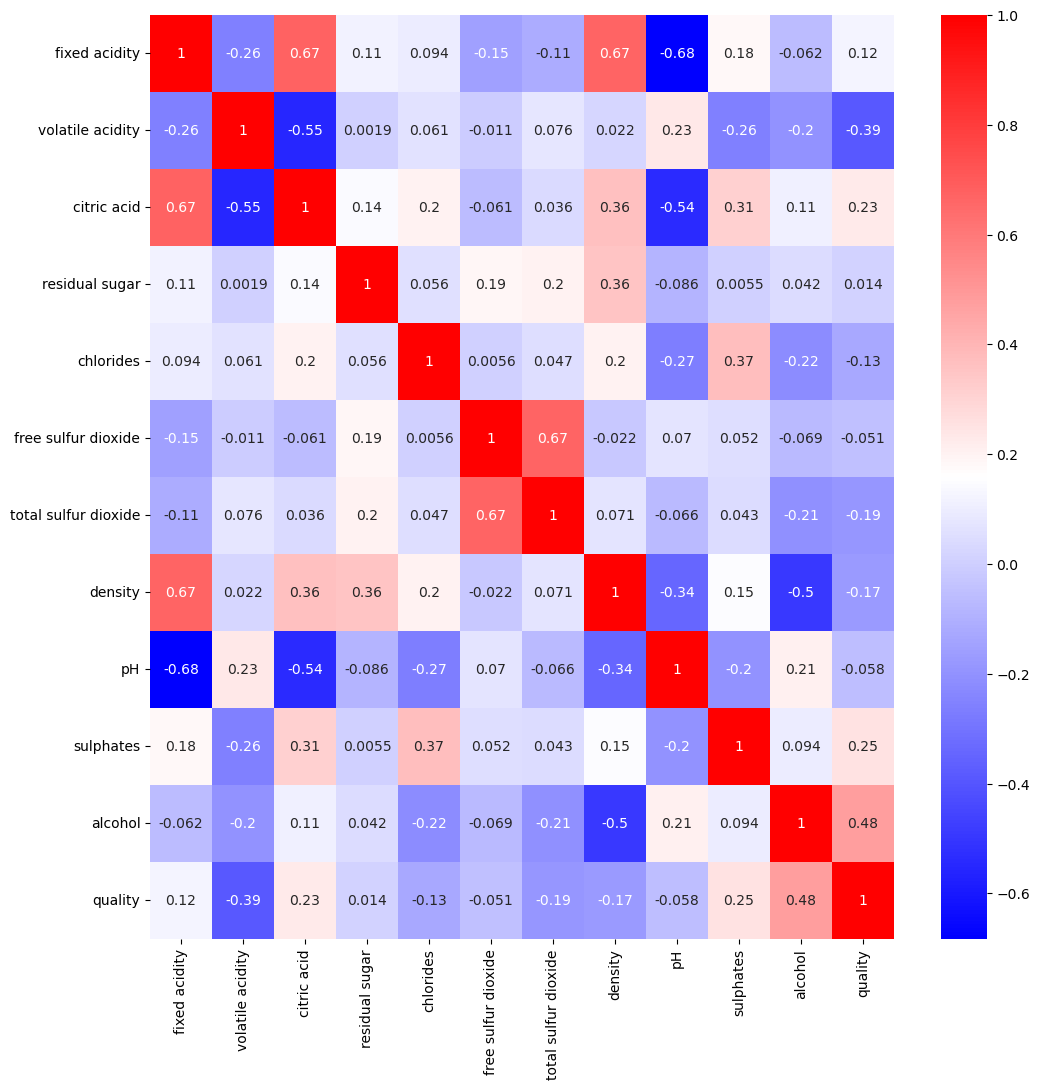

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),annot=True,cmap="bwr")
plt.show()

# Pair Plot

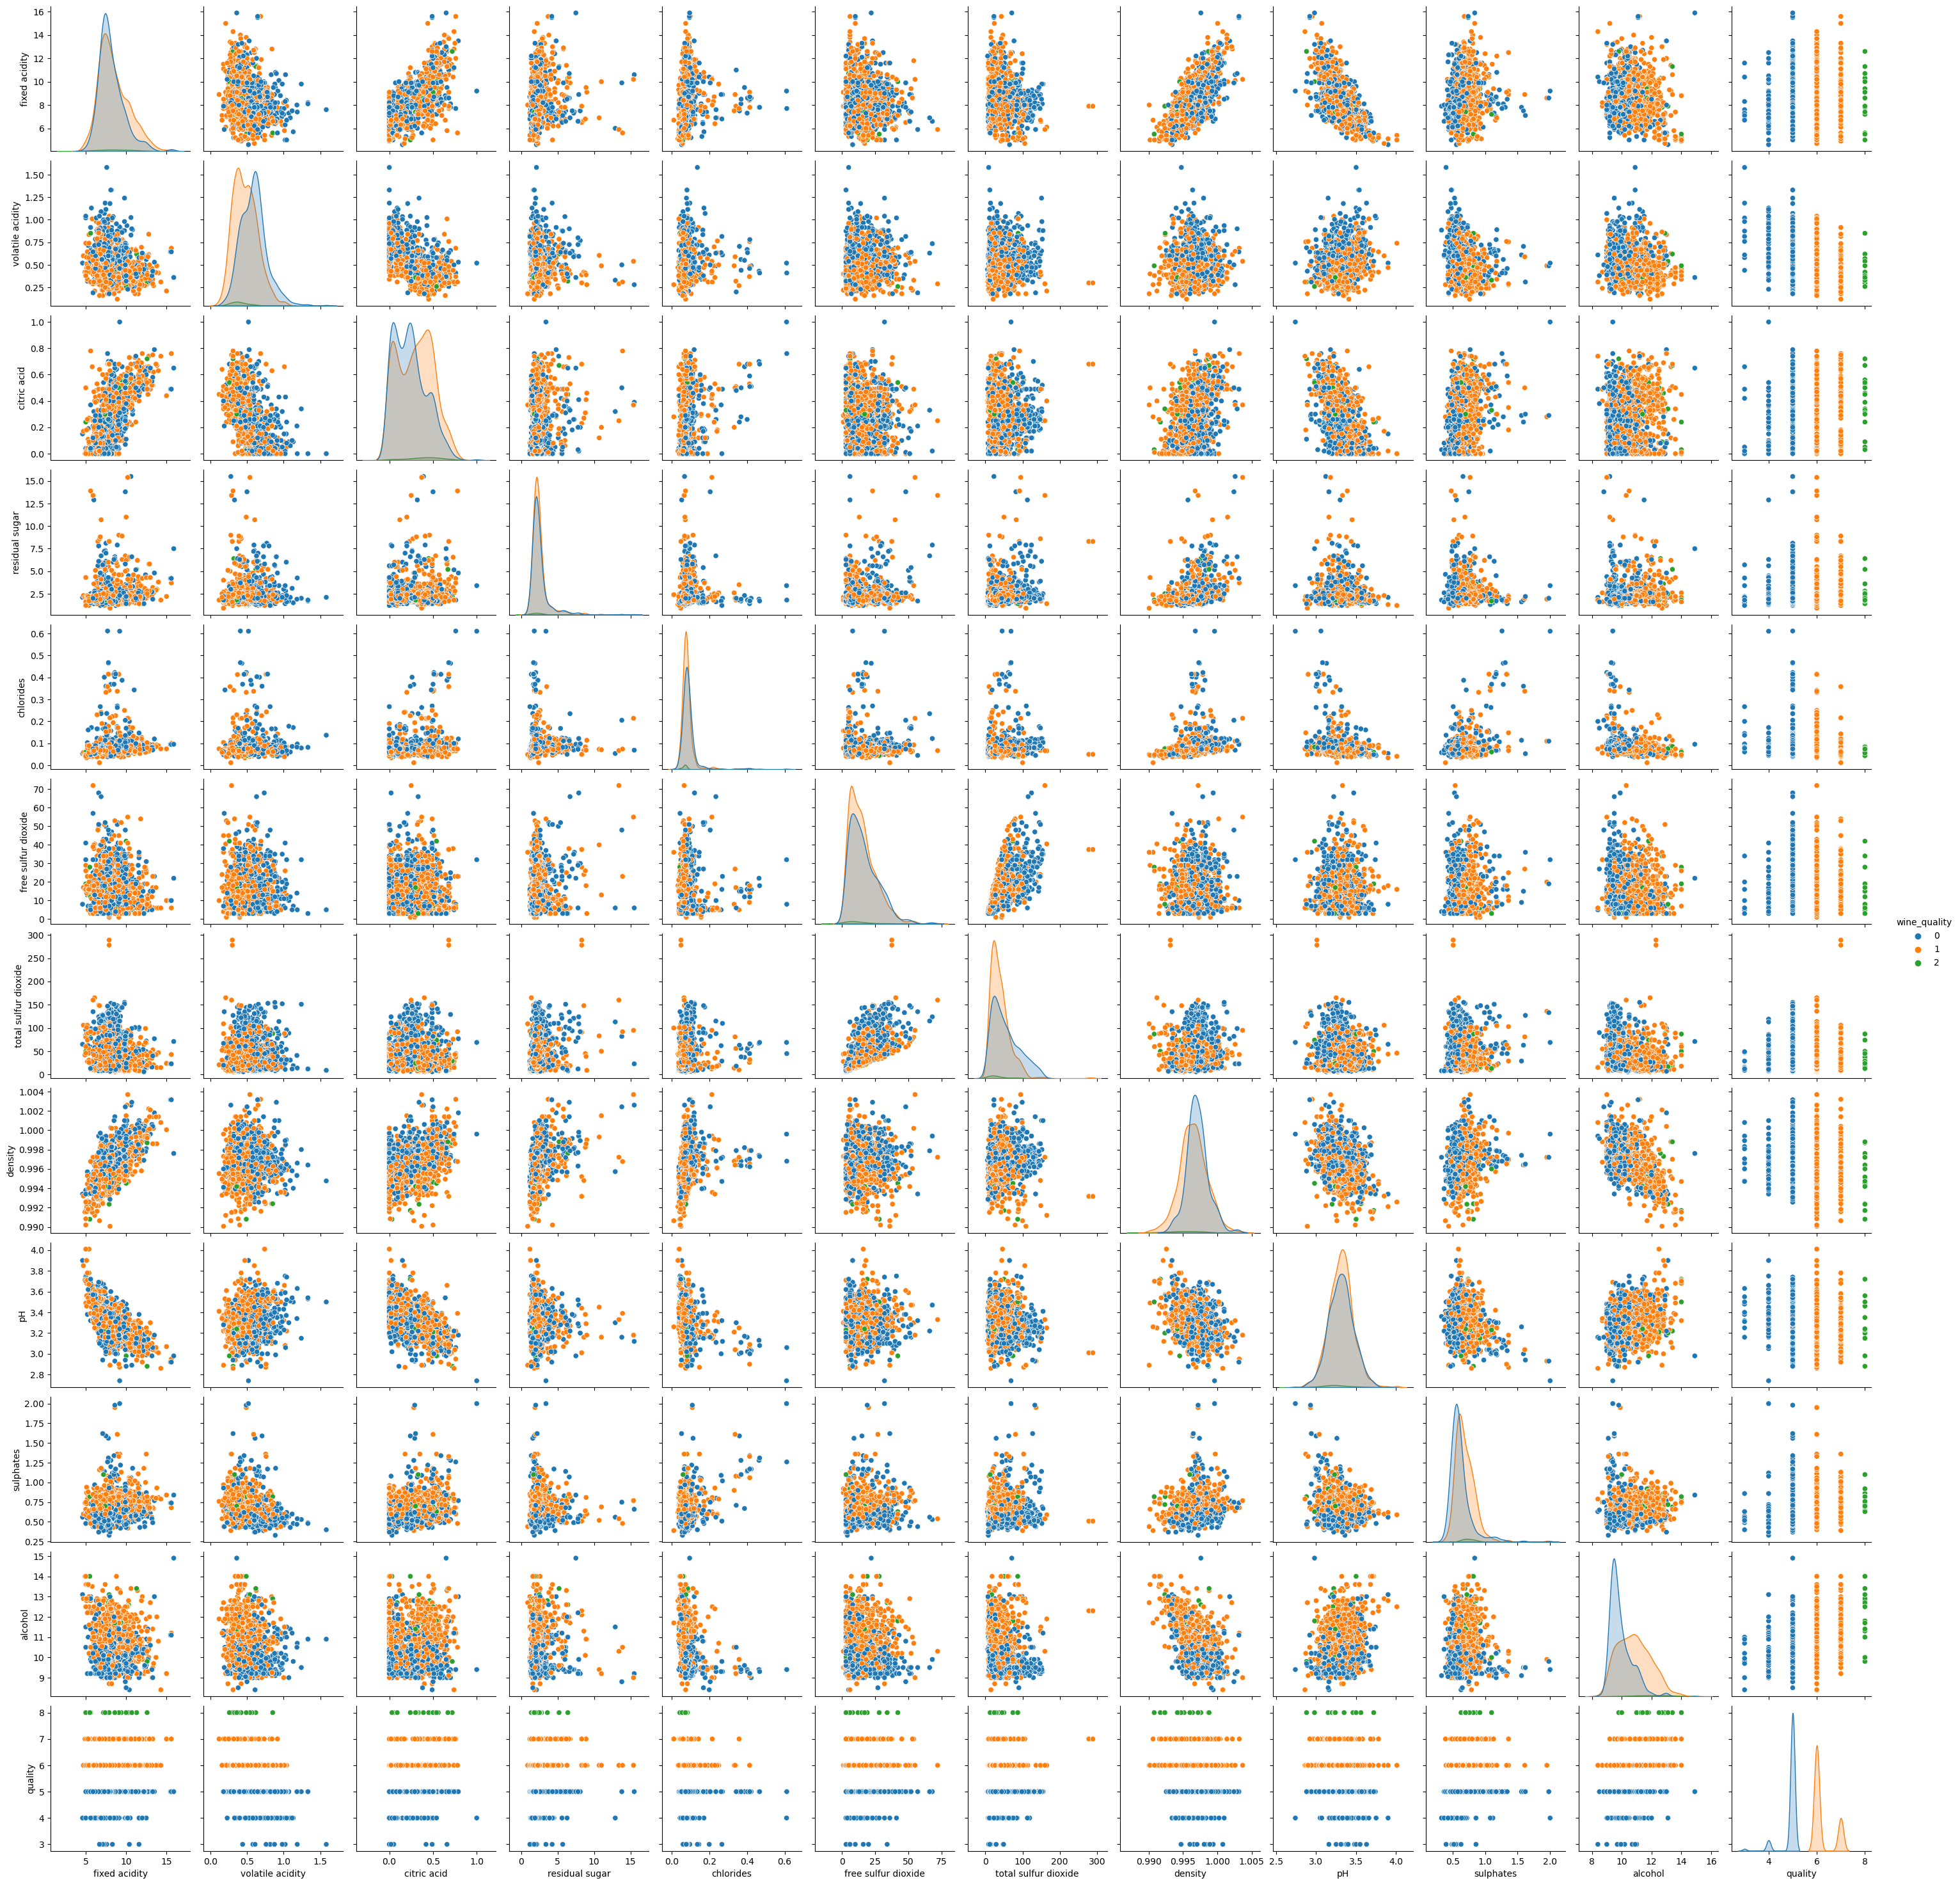

In [34]:
sns.pairplot(df,hue='wine_quality')
plt.show()

# Histogram

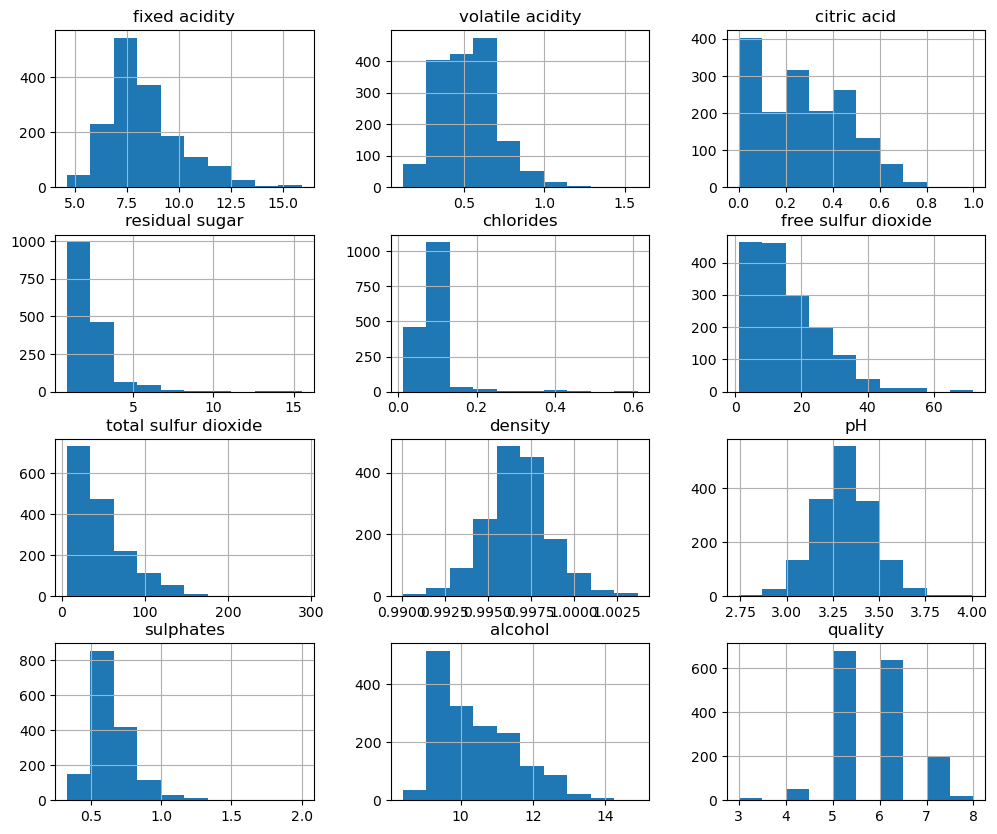

In [35]:
df.hist(bins=10,figsize=(12,10))
plt.show()

# Count Plot

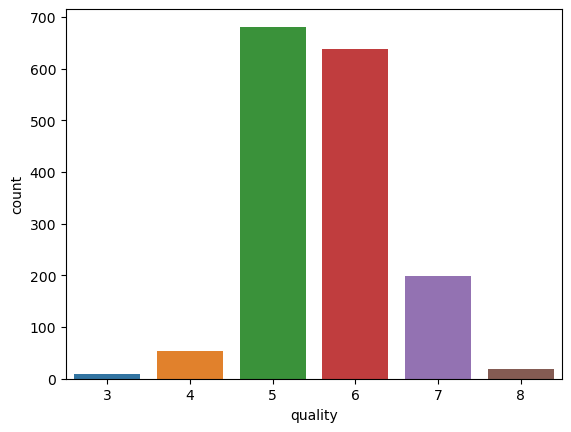

In [36]:
sns.countplot(x="quality",data=df)
plt.show()

<Axes: xlabel='wine_quality', ylabel='count'>

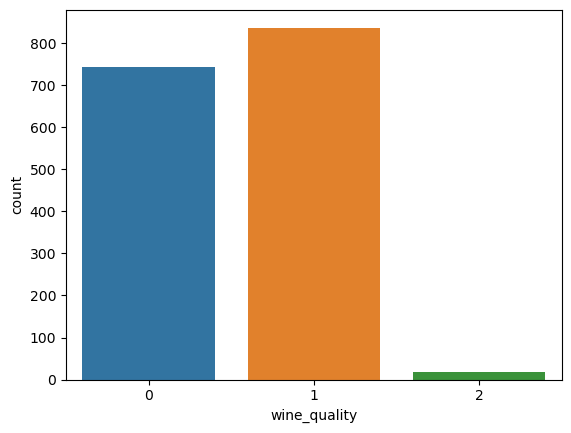

In [37]:
sns.countplot(x="wine_quality",data=df)

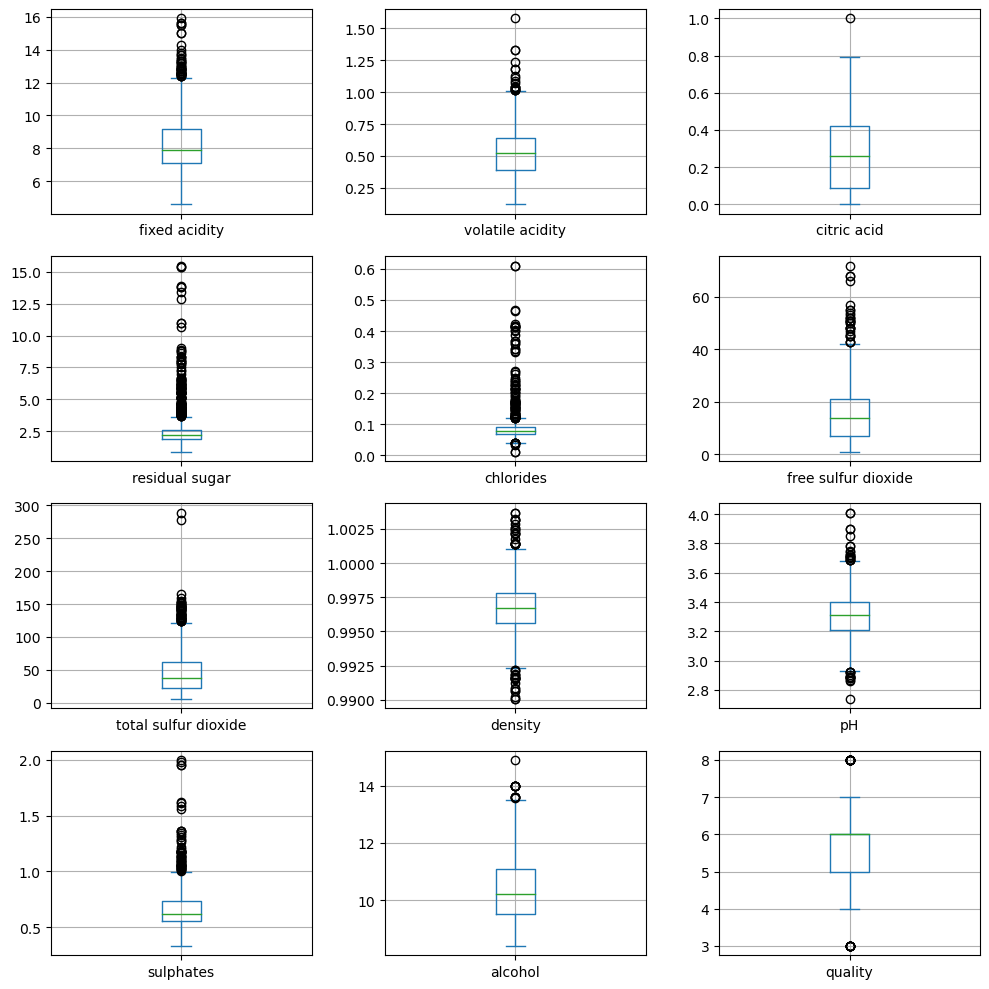

In [39]:
df.plot(kind='box',subplots=True,layout=(4,3),grid=True,figsize=(10,10))
plt.tight_layout()
plt.show()

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler,Normalizer, RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [46]:
X=df.iloc[:,:-2]
Y=df.iloc[:,-1:]
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

***Scaling of The Data***

In [47]:
X=df.iloc[:,:-2]
Y=df.iloc[:,-1:]
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [48]:
train_x,test_x,train_y,test_y=train_test_split(df,Y,test_size=0.15,random_state=2)
print("shape of train input data:",train_x.shape,"\n shape of train output data",train_y.shape,
      "\nshape of test input data ",test_x.shape,"\nshape of test output data",test_y.shape)

shape of train input data: (1359, 13) 
 shape of train output data (1359, 1) 
shape of test input data  (240, 13) 
shape of test output data (240, 1)


***LogisticRegression Model***

In [49]:
model=LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression()

In [50]:
pred=model.predict(test_x)
pred[:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [51]:
print("Accuracy Score:",accuracy_score(pred,test_y))
print("classification Report:\n",classification_report(pred,test_y))
print("confusion Matrix:\n",confusion_matrix(pred,test_y))

Accuracy Score: 0.9916666666666667
classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      0.99      0.99       141
           2       0.00      0.00      0.00         0

    accuracy                           0.99       240
   macro avg       0.67      0.66      0.66       240
weighted avg       1.00      0.99      1.00       240

confusion Matrix:
 [[ 99   0   0]
 [  0 139   2]
 [  0   0   0]]


***Support Vector Machine***

In [52]:
svc=SVC()
svc.fit(train_x,train_y)

SVC()

In [53]:
pred=svc.predict(test_x)
pred[:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [54]:
print("Accuracy Score:",accuracy_score(pred,test_y))
print("classification Report:\n",classification_report(pred,test_y))
print("confusion Matrix:\n",confusion_matrix(pred,test_y))

Accuracy Score: 0.85
classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.82        85
           1       0.93      0.83      0.88       155
           2       0.00      0.00      0.00         0

    accuracy                           0.85       240
   macro avg       0.56      0.57      0.56       240
weighted avg       0.87      0.85      0.86       240

confusion Matrix:
 [[ 75  10   0]
 [ 24 129   2]
 [  0   0   0]]


***Grid Search CV***

In [55]:
param= {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],
       'kernel':["linear","rbf"],
       'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]}

In [56]:
grid_svc= GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=5)
grid_svc.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                               1.1, 1.2, 1.3, 1.4, 1.5],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 1.1, 1.2, 1.3, 1.4, 1.5],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [60]:
grid_svc.best_params_


{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [61]:
svc2=SVC(C= 1, gamma= 0.9, kernel='rbf')

svc2.fit(train_x,train_y)

SVC(C=1, gamma=0.9)

In [62]:
pred=svc2.predict(test_x)
pred[:5]


array([1, 1, 1, 1, 0], dtype=int64)

In [63]:
print("Accuracy Score:",accuracy_score(pred,test_y))
print("classification Report:\n",classification_report(pred,test_y))
print("confusion Matrix:\n",confusion_matrix(pred,test_y))

Accuracy Score: 0.7958333333333333
classification Report:
               precision    recall  f1-score   support

           0       0.54      0.98      0.69        54
           1       0.99      0.74      0.85       186
           2       0.00      0.00      0.00         0

    accuracy                           0.80       240
   macro avg       0.51      0.57      0.51       240
weighted avg       0.89      0.80      0.81       240

confusion Matrix:
 [[ 53   1   0]
 [ 46 138   2]
 [  0   0   0]]


***Cross validation***

In [64]:
svc_eval = cross_val_score(estimator = svc2, X = train_x, y = train_y, cv =5,verbose =1)
svc_eval.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


0.7534729759062296

# Decision Tree Classifier

In [65]:
rf = RandomForestClassifier()
rf.fit(train_x,train_y)

RandomForestClassifier()

In [66]:
pred_rf=rf.predict(test_x)
pred_rf[:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [67]:
print("Accuracy Score:",accuracy_score(pred_rf,test_y))
print("classification Report:\n",classification_report(pred_rf,test_y))
print("confusion Matrix:\n",confusion_matrix(pred_rf,test_y))

Accuracy Score: 1.0
classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       139
           2       1.00      1.00      1.00         2

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

confusion Matrix:
 [[ 99   0   0]
 [  0 139   0]
 [  0   0   2]]


In [68]:
param= {'max_depth':range(3,10),
       'criterion':["gini","entropy"],
       'max_features':["auto", "sqrt", "log2"]}

In [69]:
grid_rf= GridSearchCV(RandomForestClassifier(), param_grid=param, scoring='accuracy', cv=5)
grid_rf.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [70]:
grid_rf.best_score_

1.0

In [71]:
rf = grid_rf.best_estimator_
pred_rf=rf.predict(test_x)
pred_rf[:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [72]:
print("Accuracy Score:",accuracy_score(pred_rf,test_y))
print("classification Report:\n",classification_report(pred_rf,test_y))
print("confusion Matrix:\n",confusion_matrix(pred_rf,test_y))

Accuracy Score: 1.0
classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       139
           2       1.00      1.00      1.00         2

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

confusion Matrix:
 [[ 99   0   0]
 [  0 139   0]
 [  0   0   2]]


In [73]:
rf_eval = cross_val_score(estimator = rf, X = train_x, y = train_y, cv =5,verbose =1)
rf_eval.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


1.0